Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [28]:
import pandas as pd

# Import the CSV files into DataFrames
df = pd.read_csv('df_city_bike.csv')
df_foursquare = pd.read_csv('df_foursquare.csv')
df_yelp = pd.read_csv('df_yelp.csv')


In [29]:
df_yelp = df_yelp.rename(columns={'Latitude': 'Yelp_Latitude', 'Longitude': 'Yelp_Longitude'})
df_foursquare = df_foursquare.rename(columns={'Latitude': 'Foursquare_Latitude', 'Longitude': 'Foursquare_Longitude'})


In [33]:
df_merged = df.merge(df_foursquare, on=['latitude', 'longitude'], how='left')
df_merged = df_merged.merge(df_yelp, left_on=['latitude', 'longitude'], right_on=['Yelp_Latitude', 'Yelp_Longitude'], how='left')
df_merged.head(5)


,name_x,empty_slots,free_bikes,latitude,longitude,fsq_id,name_y,rating,categories,address,Name,Rating,Address,City,State,ZIP Code,Yelp_Latitude,Yelp_Longitude
0,56 - CLN 110 W1 Norte,9,2,-15.758862,-47.88882,4cfe88e1084f548186099109,Torteria Di Lorenza,6.6,"['Café', 'Dessert Shop', 'Restaurant']","CLN 109 Bl. C, Brasília, DF, 70752-530",Feitiço Mineiro Restaurante,4.5,CLN 306 BL D lj 45/51,Brasília,DF,70745-540,-15.758862,-47.88882
1,56 - CLN 110 W1 Norte,9,2,-15.758862,-47.88882,4cfe88e1084f548186099109,Torteria Di Lorenza,6.6,"['Café', 'Dessert Shop', 'Restaurant']","CLN 109 Bl. C, Brasília, DF, 70752-530",BFC,4.0,Cln 110 BLOCO B LOJA 62,Shcn,DF,NaN,-15.758862,-47.88882
2,56 - CLN 110 W1 Norte,9,2,-15.758862,-47.88882,4cfe88e1084f548186099109,Torteria Di Lorenza,6.6,"['Café', 'Dessert Shop', 'Restaurant']","CLN 109 Bl. C, Brasília, DF, 70752-530",Maori Gastronomia,4.5,"CLN, 110",Brasília,DF,70753-000,-15.758862,-47.88882
3,56 - CLN 110 W1 Norte,9,2,-15.758862,-47.88882,4cfe88e1084f548186099109,Torteria Di Lorenza,6.6,"['Café', 'Dessert Shop', 'Restaurant']","CLN 109 Bl. C, Brasília, DF, 70752-530",Sushi Woman,4.0,CLN 109 BL A lj 20,Brasília,DF,70752-510,-15.758862,-47.88882
4,56 - CLN 110 W1 Norte,9,2,-15.758862,-47.88882,4cfe88e1084f548186099109,Torteria Di Lorenza,6.6,"['Café', 'Dessert Shop', 'Restaurant']","CLN 109 Bl. C, Brasília, DF, 70752-530",Mucho Gusto Gastronomia,4.5,CLN 309 BL A lj 20,Brasília,DF,70755-510,-15.758862,-47.88882


In [35]:
print(df_merged.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7795 entries, 0 to 7794
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name_x          7795 non-null   object 
 1   empty_slots     7795 non-null   int64  
 2   free_bikes      7795 non-null   int64  
 3   latitude        7795 non-null   float64
 4   longitude       7795 non-null   float64
 5   fsq_id          7754 non-null   object 
 6   name_y          7754 non-null   object 
 7   rating          7368 non-null   float64
 8   categories      7754 non-null   object 
 9   address         7754 non-null   object 
 10  Name            7795 non-null   object 
 11  Rating          7795 non-null   float64
 12  Address         7783 non-null   object 
 13  City            7795 non-null   object 
 14  State           7795 non-null   object 
 15  ZIP Code        6979 non-null   object 
 16  Yelp_Latitude   7795 non-null   float64
 17  Yelp_Longitude  7795 non-null   f

In [36]:
print(df_merged.describe())

       empty_slots   free_bikes     latitude    longitude       rating  \
count  7795.000000  7795.000000  7795.000000  7795.000000  7368.000000   
mean      7.902886     4.518024   -15.785951   -47.889357     7.598371   
std       3.123937     3.683393     0.020842     0.012783     0.736467   
min       1.000000     0.000000   -15.820776   -47.926690     5.600000   
25%       6.000000     2.000000   -15.803620   -47.894000     7.100000   
50%       8.000000     4.000000   -15.791100   -47.886460     7.600000   
75%      10.000000     6.000000   -15.769290   -47.882230     8.100000   
max      18.000000    14.000000   -15.743100   -47.858400     9.100000   

            Rating  Yelp_Latitude  Yelp_Longitude  
count  7795.000000    7795.000000     7795.000000  
mean      4.183900     -15.785951      -47.889357  
std       0.465741       0.020842        0.012783  
min       2.000000     -15.820776      -47.926690  
25%       4.000000     -15.803620      -47.894000  
50%       4.000000   

In [37]:
# Export to CSV
df_merged.to_csv('df_merged.csv', index=False)


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

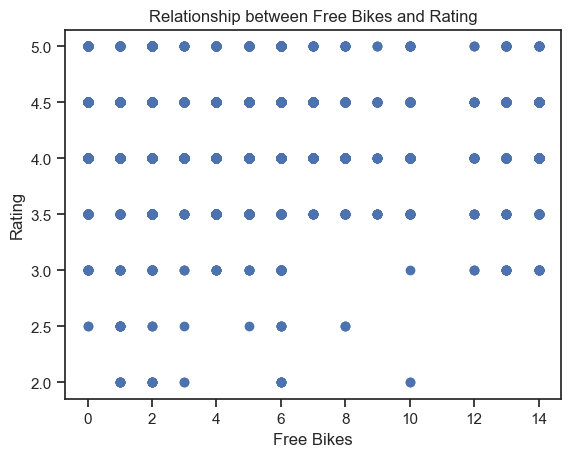

In [38]:
import matplotlib.pyplot as plt

plt.scatter(df_merged['free_bikes'], df_merged['Rating'])
plt.xlabel('Free Bikes')
plt.ylabel('Rating')
plt.title('Relationship between Free Bikes and Rating')
plt.show()


In [ ]:
# Through this visualization, I wanted to understand if there is any correlation between the availability of free bikes at bike stations and the ratings of the corresponding POIs. The scatter plot allows me to plot each data point representing a bike station, with the x-axis representing the number of free bikes and the y-axis representing the rating.

# By examining the scatter plot, I can observe the initial pattern or relationship between these two variables. If there is a clear positive correlation, it would suggest that bike stations with more free bikes tend to have higher ratings. On the other hand, if there is no significant relationship, the data points would be scattered without any specific pattern.

# Analyzing the scatter plot can help in understanding if there is any indication that higher availability of free bikes relates to higher ratings or vice versa. It provides a visual representation of the data and allows for initial insights into the relationship between these variables.

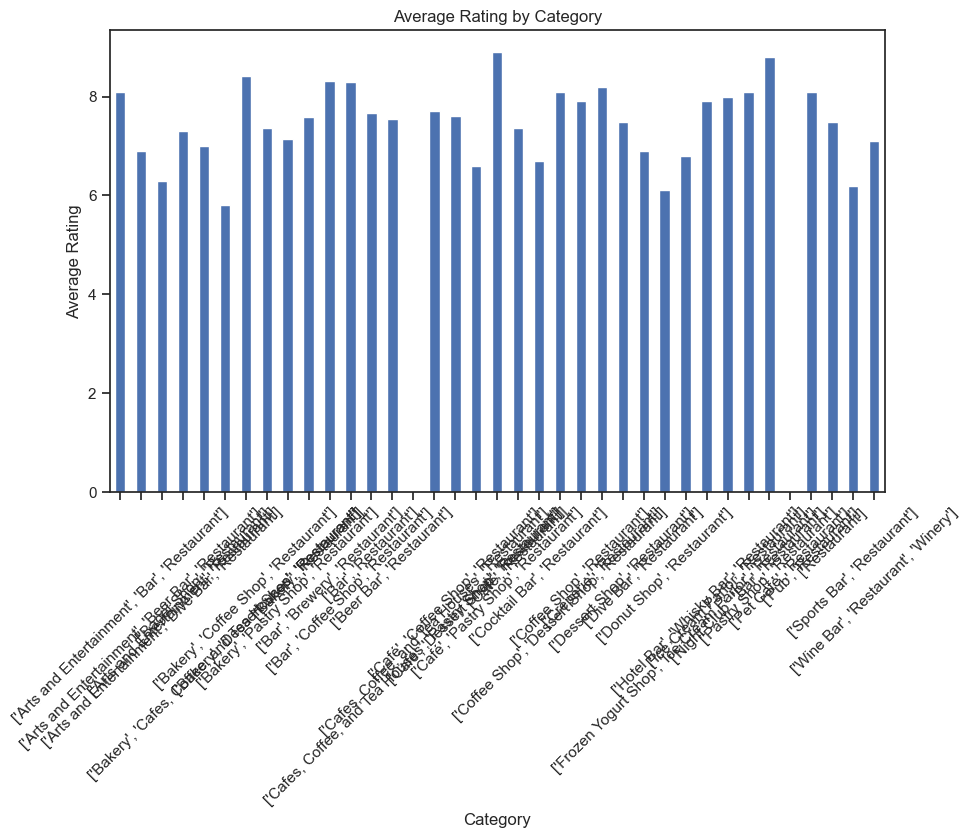

In [39]:
# Group data by category and calculate the average rating
avg_rating_by_category = df_merged.groupby('categories')['rating'].mean()

# Create bar plot
plt.figure(figsize=(10, 6))
avg_rating_by_category.plot(kind='bar')
plt.title('Average Rating by Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()


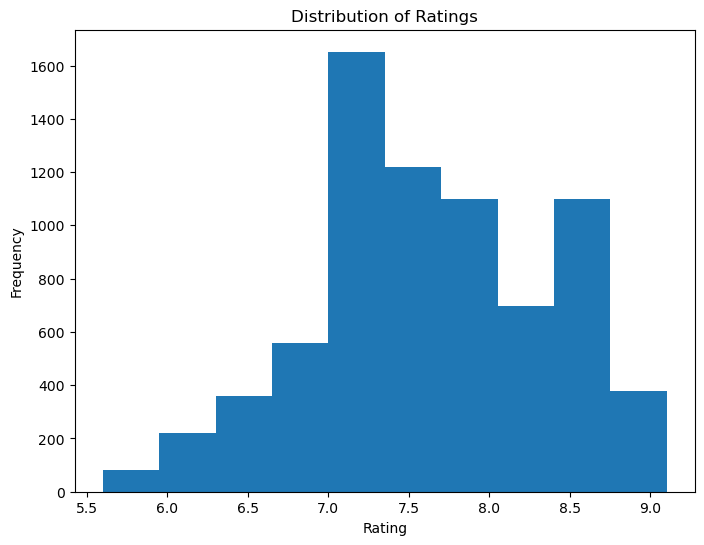

In [16]:
plt.figure(figsize=(8, 6))
plt.hist(df_merged['rating'], bins=10)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


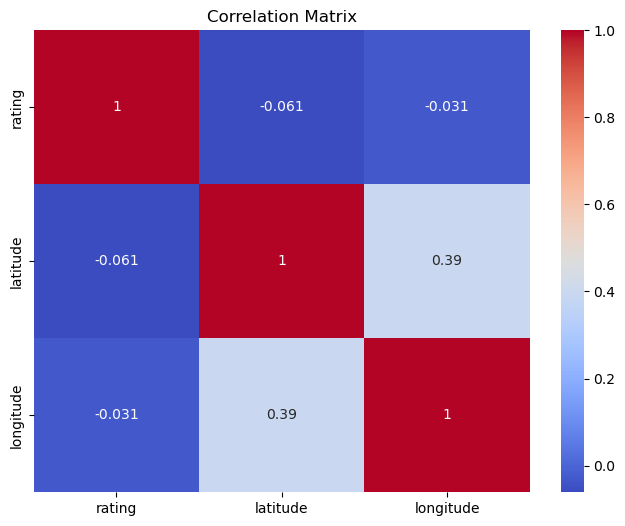

In [17]:
import seaborn as sns

# Select numerical columns for correlation matrix
numerical_cols = ['rating', 'latitude', 'longitude']

# Calculate correlation matrix
corr_matrix = df_merged[numerical_cols].corr()

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


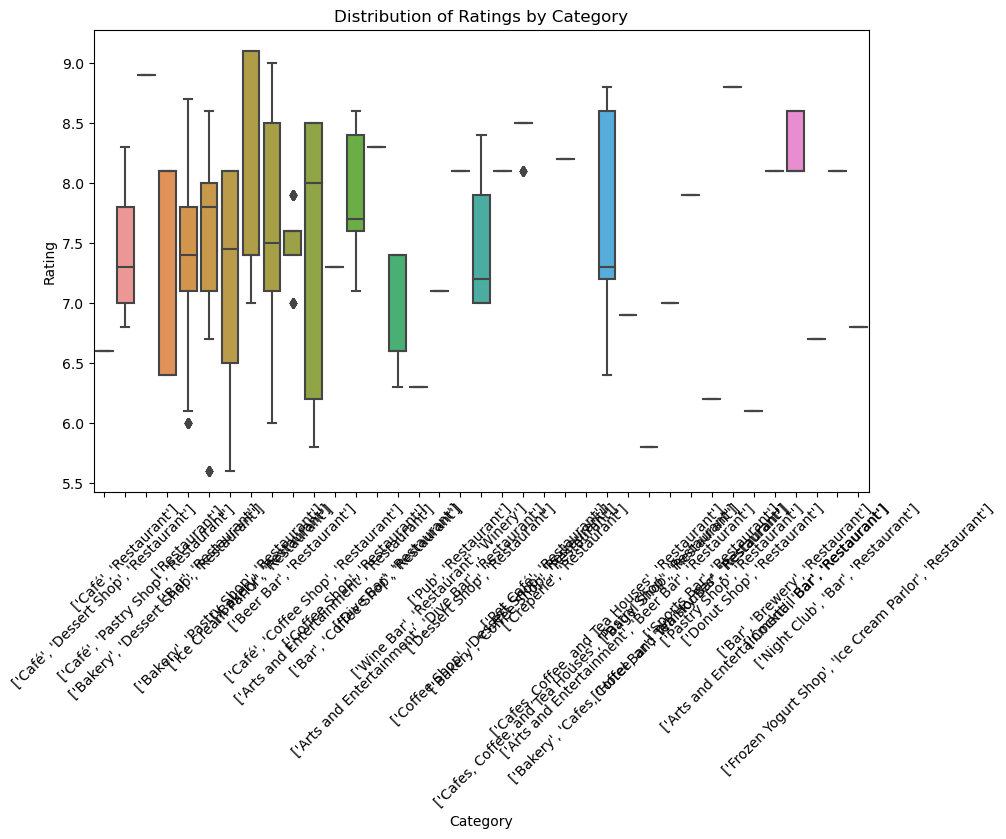

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='categories', y='rating', data=df_merged)
plt.title('Distribution of Ratings by Category')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()


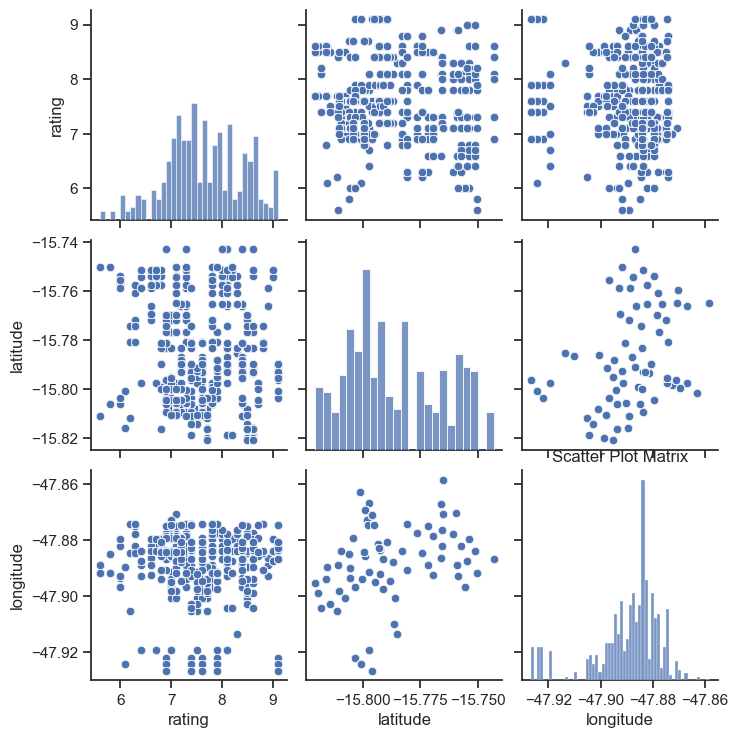

In [19]:
sns.set(style='ticks')
sns.pairplot(df_merged[['rating', 'latitude', 'longitude']])
plt.title('Scatter Plot Matrix')
plt.show()


# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [ ]:
df_yelp = df_yelp.rename(columns={'Latitude': 'Yelp_Latitude', 'Longitude': 'Yelp_Longitude'})
df_foursquare = df_foursquare.rename(columns={'Latitude': 'Foursquare_Latitude', 'Longitude': 'Foursquare_Longitude'})


In [44]:
import sqlite3

# Drop the duplicate columns
df_merged = df_merged.drop(['name_y', 'rating', 'categories', 'address', 'Name', 'Address'], axis=1)

# Create a connection to the SQLite database
conn = sqlite3.connect('my_database.db')

# Create a cursor object to execute SQL commands
cursor = conn.cursor()

# Convert the DataFrame to a SQLite table
df_merged.to_sql('poi_data', conn, if_exists='replace', index=False)

# Commit the changes and close the connection
conn.commit()
conn.close()


Look at the data before and after the join to validate your data.